In [1]:
from astropy.table import Table
from scipy.stats import binned_statistic, scoreatpercentile
import scipy.stats.distributions as dist

import urllib
from PIL import Image

source_dir = '../../fits/'
data_file = 'volume_limited_sample.fits'
debiased_file = 'debiased_volume_limited_sample.fits'

#-------------------------------------------------------
import matplotlib as mpl
from prefig import Prefig
Prefig()
% matplotlib inline

from matplotlib.ticker import MaxNLocator

plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 6
mpl.ticker.AutoLocator.default_params['prune'] = 'both'
#------------------------------------------------------

% matplotlib inline

In [2]:
data = fits.getdata(source_dir + data_file,1)
data_table = Table(data)
debiased = fits.getdata(source_dir + debiased_file,1)
debiased_table = Table(debiased)

In [12]:
s82 = data_table['sample'] == 'stripe82'
sdss = (data_table['sample'] == 'original') + (data_table['sample'] == 'extra')

In [27]:
from astropy.coordinates import matching
from astropy.coordinates import SkyCoord
from astropy import units as u

sdss_coord = SkyCoord(ra=data_table[sdss]['ra_1']*u.degree,dec=data_table[sdss]['dec_1']*u.degree)
s82_coord = SkyCoord(ra=data_table[s82]['ra_1']*u.degree,dec=data_table[s82]['dec_1']*u.degree)

i,sep2d,sep3d = matching.match_coordinates_sky(s82_coord,sdss_coord)

In [37]:
i,sep2d,sep3d = s82_coord.match_to_catalog_sky(sdss_coord)

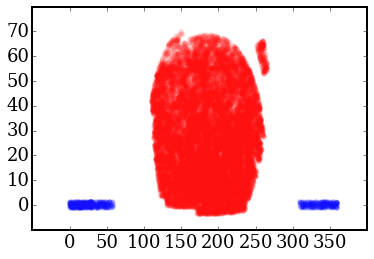

In [42]:
plt.scatter(data_table[sdss]['ra_1'],data_table[sdss]['dec_1'],color='r',alpha=0.05)
plt.scatter(data_table[s82]['ra_1'],data_table[s82]['dec_1'],color='b',alpha=0.05)

# Not the same regions?